# AI Computation & Hardware

Este conjunto de datos proporciona información sobre el rendimiento y las pruebas de conocimiento 
de varios modelos de IA en correlación con su computación de entrenamiento. 
Abarca una serie de años y organizaciones dedicadas a la investigación y el desarrollo de la IA. 
Además, incluye datos sobre el cálculo de entrenamiento (medido en petaFLOPs) utilizado para el proceso 
de entrenamiento de cada modelo.

### Hipótesis Nula
La inversión y el costo en IA no sale rentable a las empresas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importación de los datos
df_knowledge_vs_training = pd.read_csv('../data/ai-performance-knowledge-tests-vs-training-computation.csv')
df_ai_training = pd.read_csv('../data/artificial-intelligence-training-computation.csv')
df_ai_invest = pd.read_csv('../data/corporate-investment-in-artificial-intelligence-by-type.csv')
df_chip_production = pd.read_csv('../data/market-share-logic-chip-production-manufacturing-stage.csv')

In [3]:
# Entity: The name or code identifying the AI model or organization.
# MMLU avg: The average performance metric, possibly denoting Mean Multi-Layered Understanding.
# Oraginzation: The entity responsible for developing or testing the AI model.

print(df_knowledge_vs_training.info())
df_knowledge_vs_training = df_knowledge_vs_training.dropna(axis=1, how='all')

df_knowledge_vs_training

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           25 non-null     object 
 1   Code                             0 non-null      float64
 2   Year                             25 non-null     int64  
 3   MMLU avg                         25 non-null     float64
 4   Training computation (petaFLOP)  25 non-null     int64  
 5   Organization                     25 non-null     object 
dtypes: float64(2), int64(2), object(2)
memory usage: 1.3+ KB
None


,Entity,Year,MMLU avg,Training computation (petaFLOP),Organization
0,BLOOM,2022,39.13,412000000,"HuggingFace, BigScience"
1,BloombergGPT,2023,39.18,212000000,Bloomberg
2,Chinchilla,2022,67.50,588000000,Google DeepMind
3,GLM-130B,2022,44.80,312000000,Tsinghua KEG
4,GPT-2 (finetuned),2019,32.40,36000,OpenAI
5,GPT-3 (davinci),2020,43.90,393000000,OpenAI
6,GPT-3.5,2022,70.00,2580000000,OpenAI
7,GPT-4,2023,86.40,21000000000,OpenAI
8,GPT-NeoX-20B,2022,33.60,21200000,Eleuther
9,Gemini Ultra,2023,83.96,80000000000,Google DeepMind


C:\Users\rukyf\AppData\Local\Temp\ipykernel_7264\847775897.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Organization', y='MMLU avg', data=total_mmlu, palette='viridis')


<Axes: xlabel='Organization', ylabel='MMLU avg'>

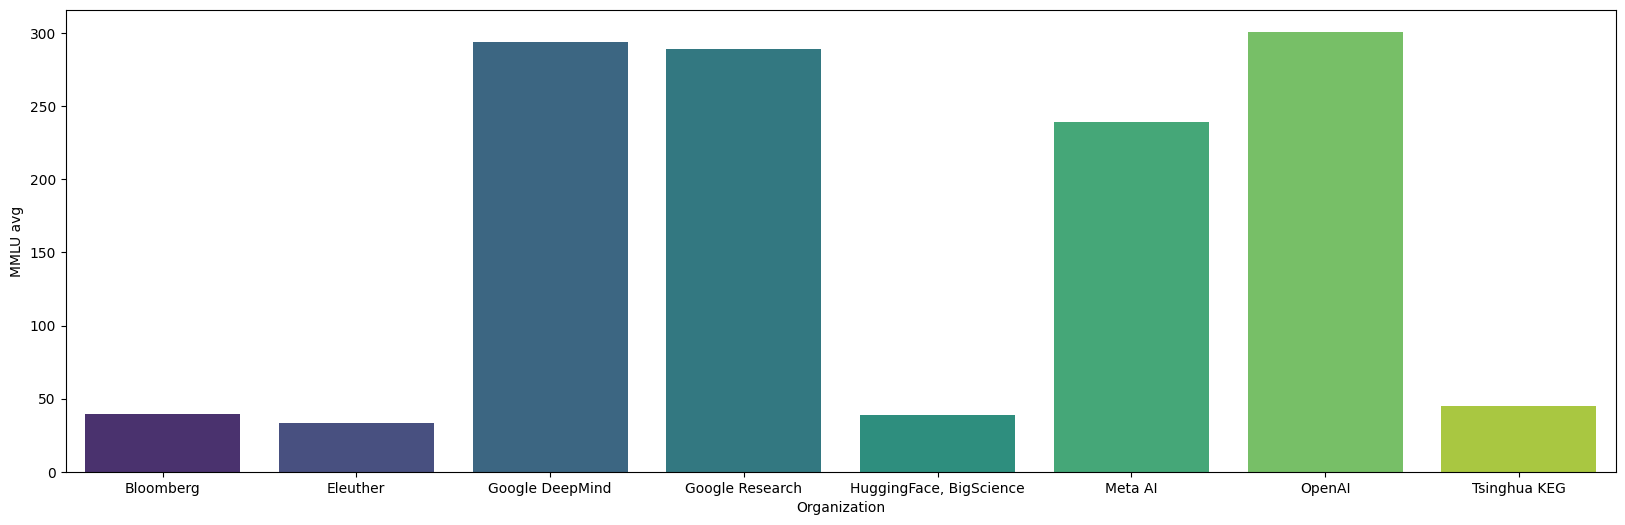

In [4]:
plt.figure(figsize=(20, 6))

df_knowledge_vs_training.sort_values(by='MMLU avg', ascending=False)
total_mmlu = df_knowledge_vs_training.groupby('Organization')['MMLU avg'].sum().reset_index()
sns.barplot(x='Organization', y='MMLU avg', data=total_mmlu, palette='viridis')


In [5]:
total_petaflops = df_knowledge_vs_training.groupby('Organization')['Training computation (petaFLOP)'].sum().reset_index()
company_petaflops = total_petaflops.sort_values(by='Training computation (petaFLOP)', ascending=False)
company_petaflops

,Organization,Training computation (petaFLOP)
2,Google DeepMind,81108071000
6,OpenAI,26553036000
3,Google Research,11516400000
5,Meta AI,1111200000
4,"HuggingFace, BigScience",412000000
7,Tsinghua KEG,312000000
0,Bloomberg,212000000
1,Eleuther,21200000


C:\Users\rukyf\AppData\Local\Temp\ipykernel_7264\2870377512.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Organization', y='Training computation (petaFLOP)', data=total_petaflops, palette='viridis')


<Axes: xlabel='Organization', ylabel='Training computation (petaFLOP)'>

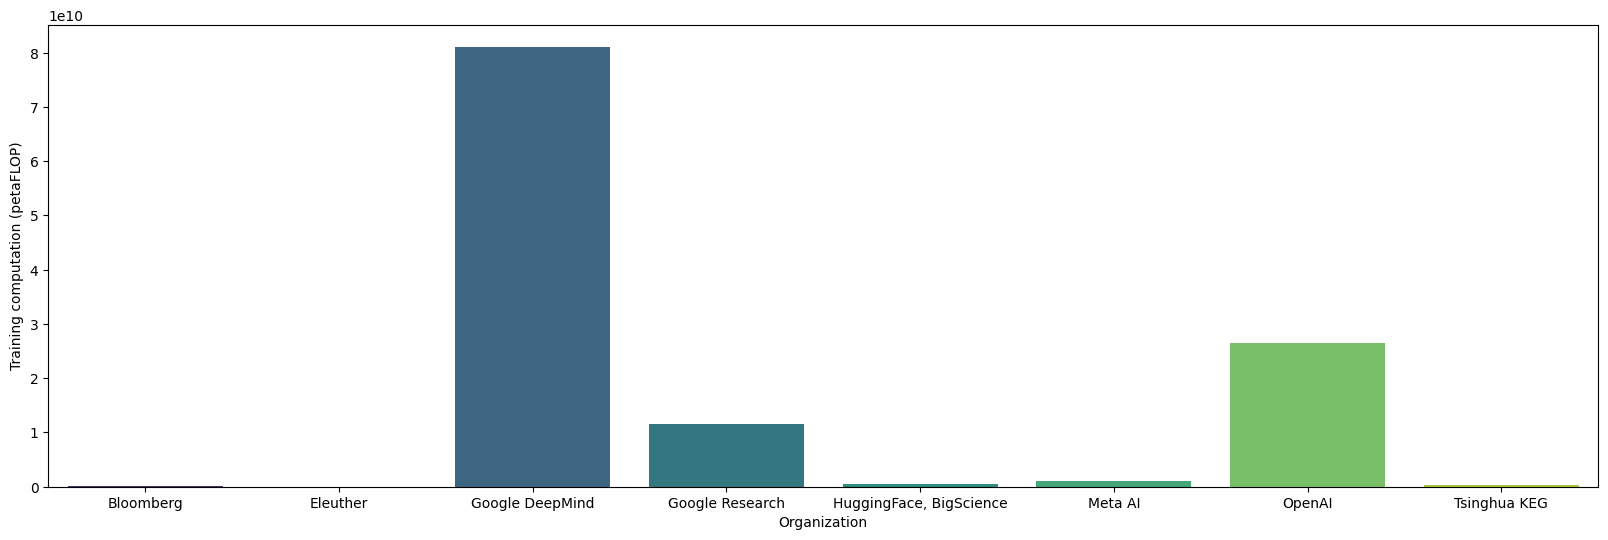

In [6]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Organization', y='Training computation (petaFLOP)', data=total_petaflops, palette='viridis')

C:\Users\rukyf\AppData\Local\Temp\ipykernel_7264\2488831091.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Training computation (petaFLOP)', data=computation_each_year, palette='viridis')


<Axes: xlabel='Year', ylabel='Training computation (petaFLOP)'>

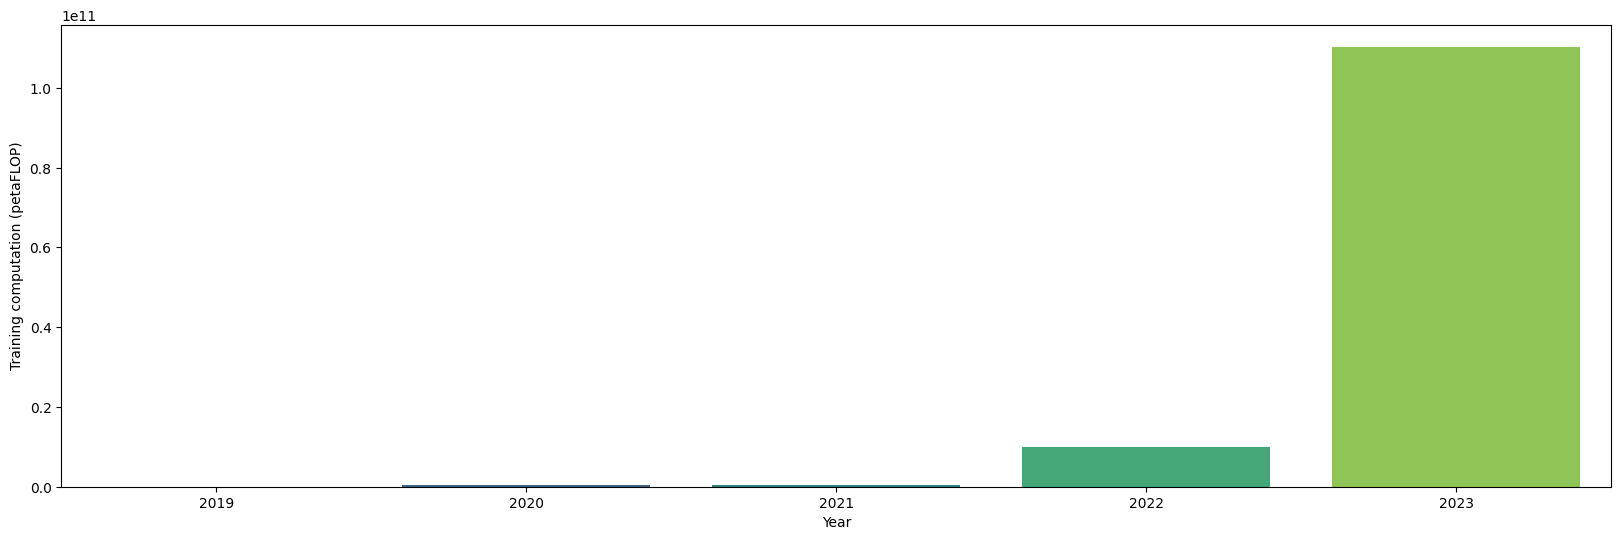

In [7]:
computation_each_year = df_knowledge_vs_training.groupby('Year')['Training computation (petaFLOP)'].sum().reset_index()
plt.figure(figsize=(20, 6))
sns.barplot(x='Year', y='Training computation (petaFLOP)', data=computation_each_year, palette='viridis')

In [8]:
computation_each_year

,Year,Training computation (petaFLOP)
0,2019,36000
1,2020,393000000
2,2021,520071000
3,2022,10021600000
4,2023,110311200000


In [9]:
df_ai_training = df_ai_training.dropna(axis=1, how='all')
df_ai_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           837 non-null    object 
 1   Day                              837 non-null    object 
 2   Training computation (petaFLOP)  382 non-null    float64
 3   Domain                           837 non-null    object 
dtypes: float64(1), object(3)
memory usage: 26.3+ KB


In [10]:
# vamos a rellenar los nulos de la columna 'Training computation' con la media si sigue una distribución normal,
# o la mediana si es una distribución sesgada.
# Se puede inferir que una distribución es sesgada cuando la desviación estándar es mayor que la mitad de la media.

#calculamos la mitad de la media
media = df_ai_training['Training computation (petaFLOP)'].mean()

# calculamos la desviación estándar
des_estandar = df_ai_training['Training computation (petaFLOP)'].std()

if des_estandar > (media/2):
    print("La columna 'Training computation (petaFLOP)' es una distribución sesgada -> Aplicando la MEDIANA a los valores nulos...\n")
    df_ai_training.fillna(value={'Training computation (petaFLOP)': df_ai_training['Training computation (petaFLOP)'].median()})
    print(df_ai_training.info())
else:
    print("La columna 'Training computation (petaFLOP)' NO es una distribución sesgada -> Aplicando la MEDIA a los valores nulos...\n")
    print(df_ai_training.info())


La columna 'Training computation (petaFLOP)' es una distribución sesgada -> Aplicando la MEDIANA a los valores nulos...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           837 non-null    object 
 1   Day                              837 non-null    object 
 2   Training computation (petaFLOP)  382 non-null    float64
 3   Domain                           837 non-null    object 
dtypes: float64(1), object(3)
memory usage: 26.3+ KB
None


In [24]:
# borramos la columna que está vacía y no nos servirá de nada
df_ai_invest = df_ai_invest.dropna(axis=1, how='all')
df_ai_invest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Entity                                           50 non-null     object
 1   Year                                             50 non-null     int64 
 2   Total corporate investment - inflation adjusted  50 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ KB


,Entity,Year,Total corporate investment - inflation adjusted
0,Merger/Acquisition,2022,77173925249
1,Merger/Acquisition,2021,119660000000
2,Merger/Acquisition,2020,27284262020
3,Merger/Acquisition,2019,33821216045
4,Merger/Acquisition,2018,23621530919
5,Merger/Acquisition,2017,27282738242
6,Merger/Acquisition,2016,14733540196
7,Merger/Acquisition,2015,10117764918
8,Merger/Acquisition,2014,7657417339
9,Merger/Acquisition,2013,6885993321


In [12]:
# Total corporate investment - inflation adjusted: The total amount of corporate investment in 
# artificial intelligence, adjusted for inflation and possibly denoted in monetary units.
suma_por_entidad = df_ai_invest.groupby('Entity')['Total corporate investment - inflation adjusted'].sum().reset_index()
suma_por_entidad
eliminar_total = suma_por_entidad[suma_por_entidad['Entity'] == 'Total']['Entity']
grupo_filtrado = suma_por_entidad[~suma_por_entidad['Entity'].isin(eliminar_total)]
grupo_filtrado



,Entity,Total corporate investment - inflation adjusted
0,Merger/Acquisition,348238388249
1,Minority Stake,69396959163
2,Private Investment,459807278094
3,Public Offering,80466789510


C:\Users\rukyf\AppData\Local\Temp\ipykernel_7264\2238580798.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Entity', y='Total corporate investment - inflation adjusted', data=grupo_filtrado, palette='viridis')


<Axes: xlabel='Entity', ylabel='Total corporate investment - inflation adjusted'>

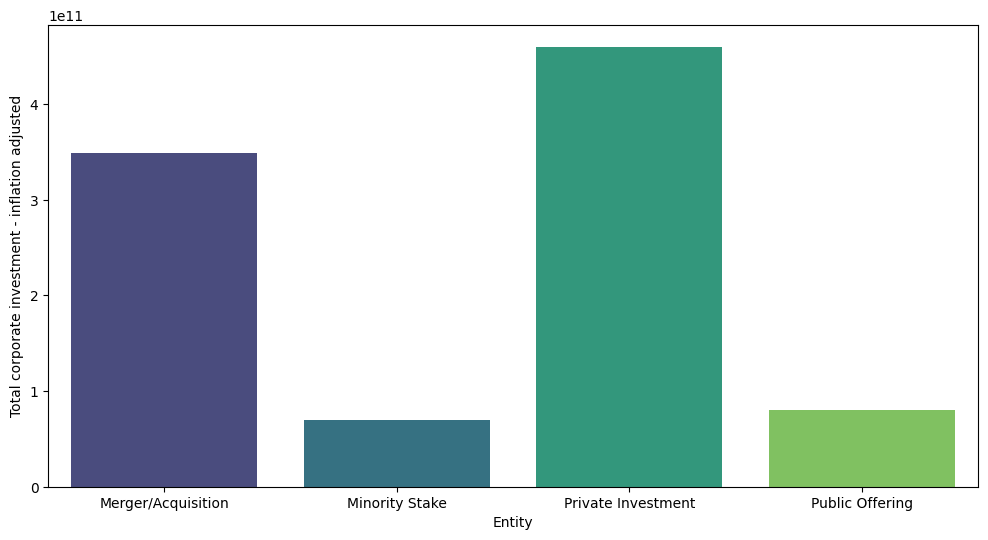

In [22]:
plt.figure(figsize=(12, 6))

# representamos gráficamente la inversión
sns.barplot(x='Entity', y='Total corporate investment - inflation adjusted', data=grupo_filtrado, palette='viridis')

In [27]:
suma_por_anio = df_ai_invest.groupby('Year')['Total corporate investment - inflation adjusted'].sum().reset_index()
eliminar_total = suma_por_anio[suma_por_anio['Entity'] == 'Total']['Entity']
grupo_filtrado_a = suma_por_anio[~suma_por_anio['Entity'].isin(eliminar_total)]
grupo_filtrado_a

C:\Users\rukyf\AppData\Local\Temp\ipykernel_7264\2305968425.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  eliminar_total = suma_por_anio[suma_por_entidad['Entity'] == 'Total']['Entity']


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [25]:
suma_por_anio = df_ai_invest.groupby('Year')['Total corporate investment - inflation adjusted'].sum().reset_index()
suma_por_anio
eliminar_total = suma_por_anio[suma_por_anio['Year'] == 'Total']['Year']
grupo_filtrado_a = suma_por_anio[~suma_por_anio['Year'].isin(eliminar_total)]
grupo_filtrado_a


,Year,Total corporate investment - inflation adjusted
0,2013,33894906316
1,2014,43586614692
2,2015,58145708894
3,2016,76366027501
4,2017,118770559024
5,2018,171836116195
6,2019,202588130202
7,2020,307267276194
8,2021,552280000000
9,2022,351083491012


C:\Users\rukyf\AppData\Local\Temp\ipykernel_7264\618815789.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Total corporate investment - inflation adjusted', data=grupo_filtrado_a, palette='viridis')


<Axes: xlabel='Year', ylabel='Total corporate investment - inflation adjusted'>

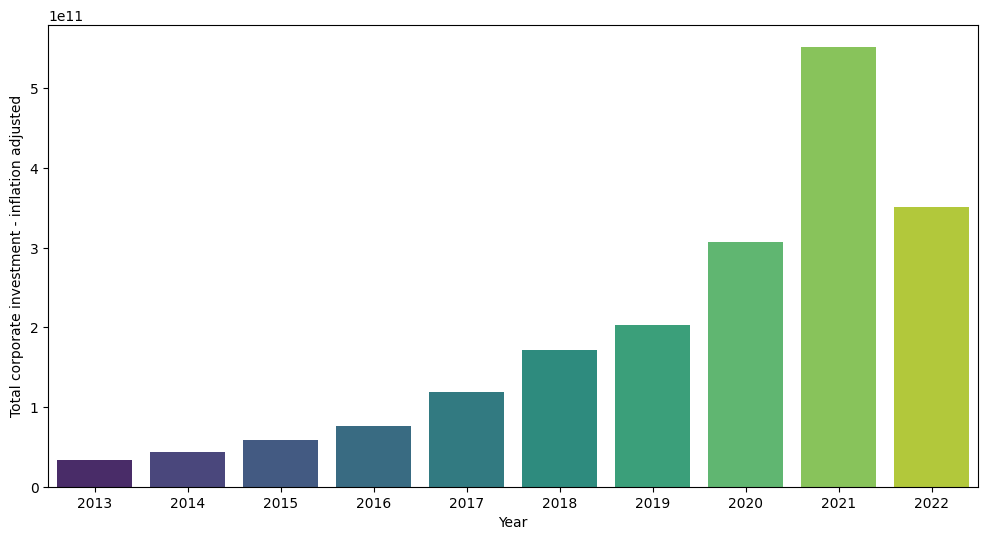

In [26]:
plt.figure(figsize=(12, 6))

# representamos gráficamente la inversión
sns.barplot(x='Year', y='Total corporate investment - inflation adjusted', data=grupo_filtrado_a, palette='viridis')

C:\Users\rukyf\AppData\Local\Temp\ipykernel_7264\3794222487.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Total corporate investment - inflation adjusted', data=grupo_filtrado_f, palette='viridis')


<Axes: xlabel='Year', ylabel='Total corporate investment - inflation adjusted'>

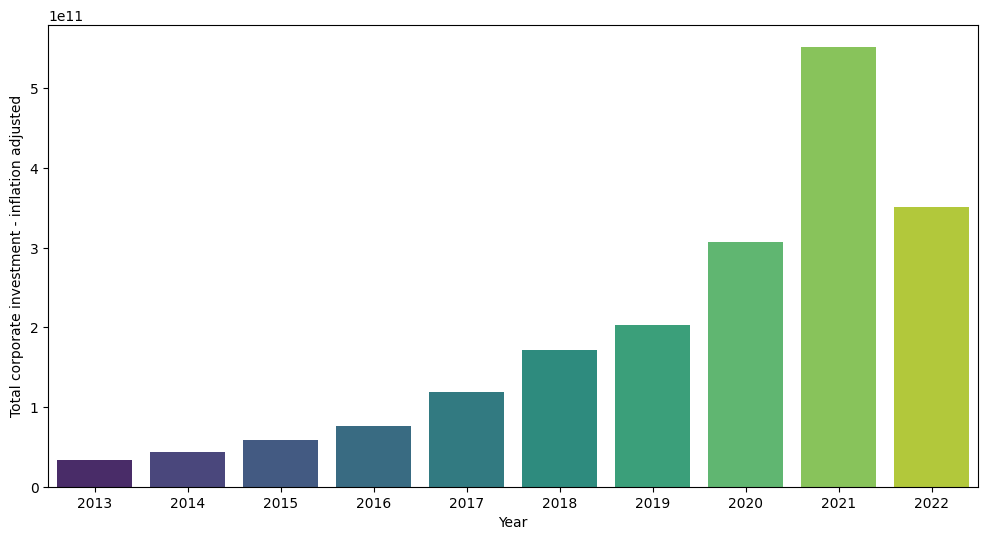

In [15]:
plt.figure(figsize=(12, 6))

# representamos gráficamente la inversión
sns.barplot(x='Year', y='Total corporate investment - inflation adjusted', data=grupo_filtrado_f, palette='viridis')

In [16]:
ai_companies = pd.read_csv('../data/AI_Companies.csv')
ai_companies


,Company_Name,Website,Location,Minimum Project Size,Average Hourly Rate,Number of Employees,Percent AI Service Focus,Unnamed: 7
0,Smith.ai,https://smith.ai/,"Los Altos, CA",Undisclosed,Undisclosed,250 - 999,10%,NaN
1,MooveIt,https://moove-it.com/,"Austin, TX","$100,000+",$50 - $99 / hr,50 - 249,15%,NaN
2,TechSpeedInc,http://www.techspeed.com/,"Portland, OR","$1,000+",< $25 / hr,50 - 249,40%,NaN
3,WillDom,https://willdom.com/,"Fort Lauderdale, FL","$10,000+",$50 - $99 / hr,250 - 999,10%,NaN
4,Icreon,https://www.icreon.com/en,"New York, NY","$50,000+",$100 - $149 / hr,250 - 999,10%,NaN
...,...,...,...,...,...,...,...,...
3095,HurekaTechnologiesInc,http://www.hurekatek.com,"New Brunswick, NJ","$10,000+",$25 - $49 / hr,10 - 49,20%,NaN
3096,MYZEALI.T.SolutionsLLC,http://www.myzealit.com/,"Los Angeles, CA","$10,000+",$25 - $49 / hr,250 - 999,10%,NaN
3097,Intelia,https://intelia.io/,"Lagos, Nigeria","$25,000+",Undisclosed,10 - 49,20%,NaN
3098,MojoTrek,http://www.mojotrek.com,"Chicago, IL","$10,000+",$50 - $99 / hr,10 - 49,25%,NaN


In [17]:
# limpiamos los datos de caracteres que no queremos
caracteres_a_eliminar = r'[$+,]'
ai_companies['Minimum Project Size'] = ai_companies['Minimum Project Size'].str.replace(caracteres_a_eliminar, '', regex=False).replace()
ai_companies['Minimum Project Size'] = pd.to_numeric(ai_companies['Minimum Project Size'], errors='coerce')
ai_companies['Minimum Project Size'] = ai_companies['Minimum Project Size'].fillna(0).astype(int) # reemplazamos los valores no numéricos por 0
ai_companies


C:\Users\rukyf\AppData\Local\Temp\ipykernel_7264\1728128803.py:3: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  ai_companies['Minimum Project Size'] = ai_companies['Minimum Project Size'].str.replace(caracteres_a_eliminar, '', regex=False).replace()


,Company_Name,Website,Location,Minimum Project Size,Average Hourly Rate,Number of Employees,Percent AI Service Focus,Unnamed: 7
0,Smith.ai,https://smith.ai/,"Los Altos, CA",0,Undisclosed,250 - 999,10%,NaN
1,MooveIt,https://moove-it.com/,"Austin, TX",0,$50 - $99 / hr,50 - 249,15%,NaN
2,TechSpeedInc,http://www.techspeed.com/,"Portland, OR",0,< $25 / hr,50 - 249,40%,NaN
3,WillDom,https://willdom.com/,"Fort Lauderdale, FL",0,$50 - $99 / hr,250 - 999,10%,NaN
4,Icreon,https://www.icreon.com/en,"New York, NY",0,$100 - $149 / hr,250 - 999,10%,NaN
...,...,...,...,...,...,...,...,...
3095,HurekaTechnologiesInc,http://www.hurekatek.com,"New Brunswick, NJ",0,$25 - $49 / hr,10 - 49,20%,NaN
3096,MYZEALI.T.SolutionsLLC,http://www.myzealit.com/,"Los Angeles, CA",0,$25 - $49 / hr,250 - 999,10%,NaN
3097,Intelia,https://intelia.io/,"Lagos, Nigeria",0,Undisclosed,10 - 49,20%,NaN
3098,MojoTrek,http://www.mojotrek.com,"Chicago, IL",0,$50 - $99 / hr,10 - 49,25%,NaN


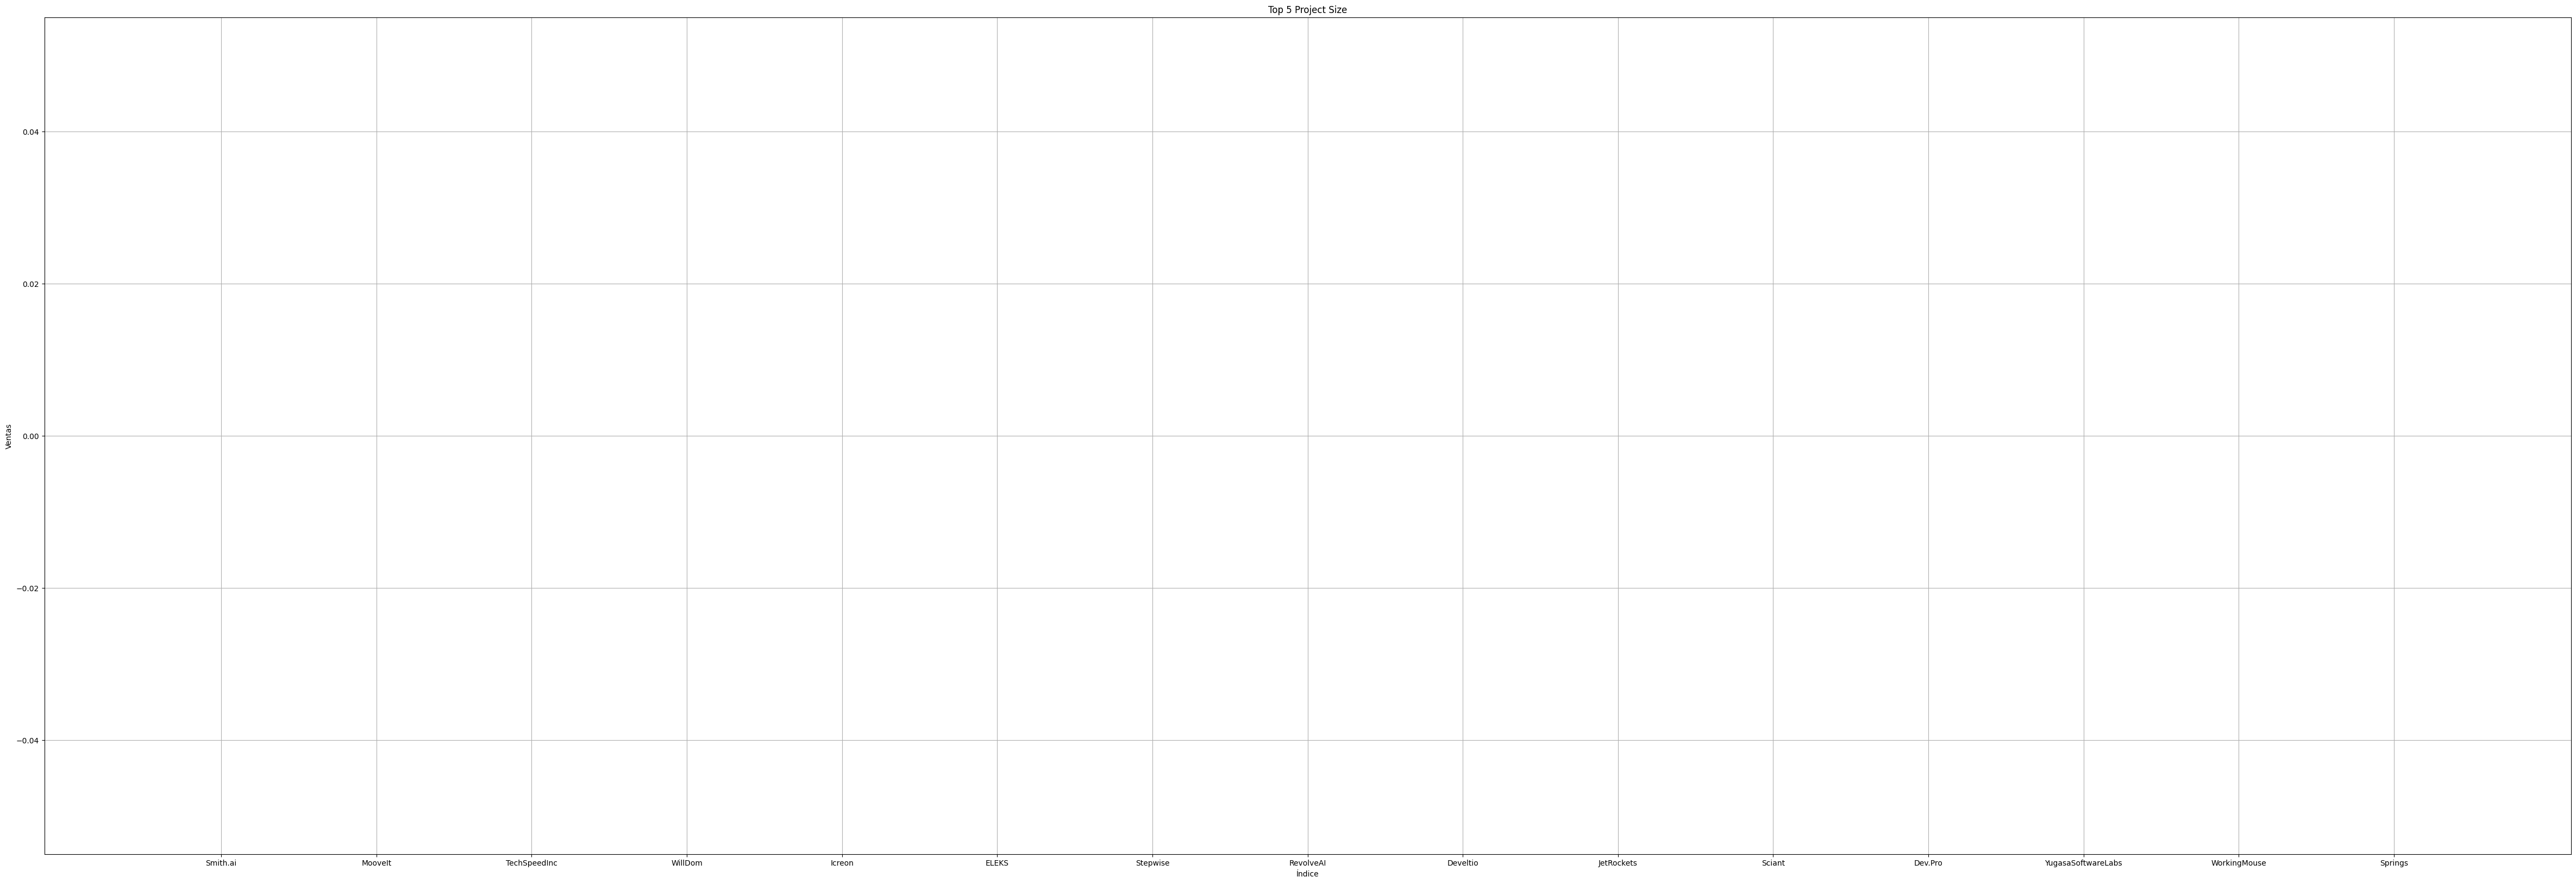

In [18]:
# top 5 minimum project size
top_5_project_size = ai_companies.nlargest(15, 'Minimum Project Size')

# Crear un gráfico de barras
plt.figure(figsize=(60, 20))
plt.bar(top_5_project_size['Company_Name'], top_5_project_size['Minimum Project Size'], color='skyblue')
plt.title('Top 5 Project Size')
plt.xlabel('Índice')
plt.ylabel('Ventas')
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [19]:
ai_companies['Percent AI Service Focus'] = ai_companies['Percent AI Service Focus'].str.replace('%', '', regex=False).replace()
ai_companies['Percent AI Service Focus'] = pd.to_numeric(ai_companies['Percent AI Service Focus'], errors='coerce')
ai_companies['Percent AI Service Focus'] = ai_companies['Percent AI Service Focus'].fillna(0).astype(int) # reemplazamos los valores no numéricos por 0

C:\Users\rukyf\AppData\Local\Temp\ipykernel_7264\2755699786.py:1: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  ai_companies['Percent AI Service Focus'] = ai_companies['Percent AI Service Focus'].str.replace('%', '', regex=False).replace()


In [20]:
# top 5 percentaje AI services
filas_filtradas = ai_companies[ai_companies['Percent AI Service Focus'] == 100]
top_5_project_size = ai_companies.nlargest(15, 'Minimum Project Size')
# NickelRedSolutions(Pvt)Ltd.
# Everise
# Profinit
top_5_project_size

,Company_Name,Website,Location,Minimum Project Size,Average Hourly Rate,Number of Employees,Percent AI Service Focus,Unnamed: 7
0,Smith.ai,https://smith.ai/,"Los Altos, CA",0,Undisclosed,250 - 999,10,NaN
1,MooveIt,https://moove-it.com/,"Austin, TX",0,$50 - $99 / hr,50 - 249,15,NaN
2,TechSpeedInc,http://www.techspeed.com/,"Portland, OR",0,< $25 / hr,50 - 249,40,NaN
3,WillDom,https://willdom.com/,"Fort Lauderdale, FL",0,$50 - $99 / hr,250 - 999,10,NaN
4,Icreon,https://www.icreon.com/en,"New York, NY",0,$100 - $149 / hr,250 - 999,10,NaN
5,ELEKS,https://eleks.com,"Tallinn, Estonia",0,$50 - $99 / hr,"1,000 - 9,999",10,NaN
6,Stepwise,https://www.stepwise.pl/,"Warszawa, Poland",0,$50 - $99 / hr,10 - 49,20,NaN
7,RevolveAI,https://www.revolveai.com/,"Islamabad, Pakistan",0,$25 - $49 / hr,10 - 49,100,NaN
8,Develtio,http://www.develtio.com/,"Warszawa, Poland",0,$25 - $49 / hr,50 - 249,20,NaN
9,JetRockets,http://jetrockets.com,"Brooklyn, NY",0,$50 - $99 / hr,10 - 49,10,NaN
